In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.duration.hazard_regression as coxph
import lifelines
import matplotlib.pyplot as plt
import dcurves

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
df_binary = dcurves.load_test_data.load_binary_df()
df_surv = dcurves.load_test_data.load_survival_df()
df_case_control = dcurves.load_test_data.load_case_control_df()
df_cancer_dx = dcurves.load_test_data.load_cancerdx_df()

In [4]:
df_binary.columns

Index(['patientid', 'cancer', 'dead', 'risk_group', 'age', 'famhistory',
       'marker', 'cancerpredmarker'],
      dtype='object')

In [5]:
'patientid' in df_binary.columns

True

In [ ]:
binary_output_df = dcurves.dca(
        data = df_binary,
        outcome = 'cancer',
        predictors = ['cancerpredmarker', 'marker'],
        thresh_vals = [0.01, 1.0, 0.01],
        probabilities = [False, True]
)


In [ ]:
survival_output_df = dcurves.dca(
    data = df_surv,
    outcome = 'cancer',
    predictors = ['cancerpredmarker'],
    thresh_vals = [0.01, 1.0, 0.01],
    probabilities = [False],
    time = 1,
    time_to_outcome_col = 'ttcancer'
)

In [8]:
dan_test_output_df = dcurves.dca(
    data = df_cancer_dx,
    outcome = 'cancer',
    predictors = ['famhistory'],
    thresh_vals = [0.01, 1.0, 0.01],
    probabilities = [False]
)


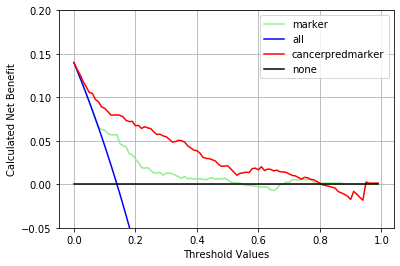

In [20]:
dcurves.plot_graphs(after_dca_df=binary_output_df,
                    graph_type='net_benefit',
                    y_limits=[-0.05, 0.2],
                    color_names=['lightgreen', 'blue', 'red', 'black'])

In [10]:
after_nia_df = dcurves.net_intervention_avoided(after_dca_df=binary_output_df)

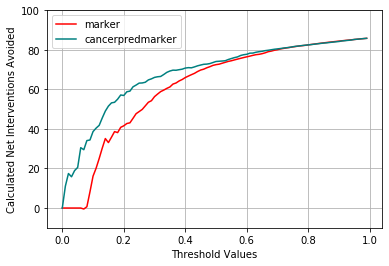

In [22]:
dcurves.plot_graphs(after_dca_df=after_nia_df,
                    graph_type='net_intervention_avoided',
                    y_limits=[-10, 100],
                    color_names=['red', 'teal'])

In [ ]:
    
plot_graphs(after_dca_df = after_net_interventions_avoided_df,
graph_type='net_intervention_avoided',
y_limits=[-10,100],
color_names=['red','teal'])

/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/dca.py:440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_frame['all'] = [1 for i in range(0, len(model_frame.index))]
/Users/ShaunPorwal/Documents/GitHub/python_packages/dcurves/dcurves/dca.py:441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_frame['none'] = [0 for i in range(0, len(model_frame.index))]


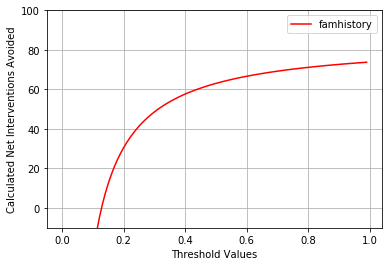

In [34]:
df_binary = dcurves.load_test_data.load_binary_df()
after_dca_df = dcurves.dca(
    data = df_binary,
    outcome = 'cancer',
    predictors = ['famhistory'],
    probabilities = [False]
    
    )

after_net_interventions_avoided_df = dcurves.net_intervention_avoided(
    after_dca_df=after_dca_df)

dcurves.plot_graphs(
    after_dca_df = after_net_interventions_avoided_df,
    graph_type='net_intervention_avoided',
    y_limits=[-10,100],
    color_names=['red','teal']
)


In [21]:
help(dcurves.net_intervention_avoided)

Help on function net_intervention_avoided in module dcurves.dca:

net_intervention_avoided(after_dca_df: pandas.core.frame.DataFrame, nper: int = 100)
    |
    
    Calculate net interventions avoided after performing decision curve analysis
    
    |
    
    Examples
    ________
    
    |
    
    >>> df_binary = dcurves.load_test_data.load_binary_df()
    
    >>> after_dca_df = dcurves.dca(
    ...     data = df_binary,
    ...     outcome = 'cancer',
    ...     predictors = ['famhistory']
    ... )
    
    >>> after_net_intervention_avoided_df = dcurves.net_intervention_avoided(
    ... after_dca_df = after_dca_df,
    ... nper = 100
    ...)
    
    >>> plot_graphs()
    
    |
    
    
    Parameters
    __________
    after_dca_df : pd.DataFrame
        dataframe outputted by dca function in the dcurves library
    nper : int
        number to report net interventions per （Defaults to 100)
    
    Return
    ______



In [ ]:
dcurves.plot_graphs(dan_test_output_df)

In [ ]:
# View DCA function Help Information